<a href="https://colab.research.google.com/github/pk38/DimensionalBiasDetection/blob/dev_div/EDA_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Drive to import the dataset

In [1]:
import seaborn 
import pandas as pd 
import numpy as np 
import random
import ast
import matplotlib.pyplot as plt 
from google.colab import drive
import collections
from scipy.stats.stats import pearsonr
# Visualization
import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity


<ipython-input-1-e7767c8b5ecf>:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/Shared drives/CSE293ResearchProject/ml-latest-small/Dataset


Mounted at /content/drive/
/content/drive/Shared drives/CSE293ResearchProject/ml-latest-small/Dataset


RATING


In [3]:
%cd /content/drive/Shared drives/CSE293ResearchProject/ml-latest-small
ratings = pd.read_csv('ratings.csv')
ratings

/content/drive/Shared drives/CSE293ResearchProject/ml-latest-small


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
ratings['rating'].value_counts()


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [5]:
ratings['rating'].describe()


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

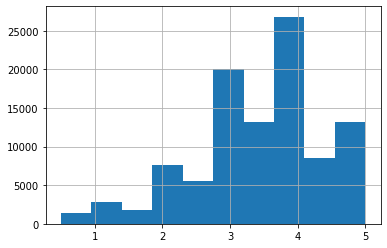

In [6]:
plt = ratings['rating'].hist(bins=10)


<Axes: >

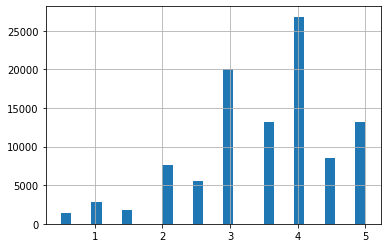

In [7]:
ratings['rating'].hist(bins=30)


In [8]:
# Get the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
# Number of users
print('The ratings dataset has', ratings['userId'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', ratings['movieId'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 610 unique users
The ratings dataset has 9724 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


MOVIES

In [10]:
%cd /content/drive/Shared drives/CSE293ResearchProject/ml-latest-small/Dataset
movies_data = pd.read_csv('final_1.csv')
# converting movie id to integer
movies_data['movieId'] = movies_data['movieId'].astype('int')
movies_data.drop(movies_data.columns[0], axis=1, inplace=True)
movies_data.head()

/content/drive/Shared drives/CSE293ResearchProject/ml-latest-small/Dataset


,movieId,imdbId,tmdbId,Directors,Cast
0,1,114709,862.0,['John Lasseter'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,2,113497,8844.0,['Joe Johnston'],"['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
2,3,113228,15602.0,['Howard Deutch'],"['Walter Matthau', 'Jack Lemmon', 'Sophia Lore..."
3,4,114885,31357.0,['Forest Whitaker'],"['Whitney Houston', 'Angela Bassett', 'Loretta..."
4,5,113041,11862.0,['Charles Shyer'],"['Steve Martin', 'Diane Keaton', 'Martin Short..."


In [11]:
movies_data.size

97420

In [12]:
%cd /content/drive/Shared drives/CSE293ResearchProject/ml-latest-small
ratings = pd.read_csv('ratings.csv')
ratings.head()

/content/drive/Shared drives/CSE293ResearchProject/ml-latest-small


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Merging the data

In [15]:
all_data = ratings.merge(movies)
all_data = all_data.merge(movies_data)
all_data["genres"]= all_data["genres"].str.split("|", expand = False)
all_data
all_data.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,Directors,Cast
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,['John Lasseter'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,['John Lasseter'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
2,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,['John Lasseter'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
3,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,['John Lasseter'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
4,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,['John Lasseter'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."


Converting Director and Cast to suitable lists

In [16]:
def str_to_list(s):
    return ast.literal_eval(s)

# apply function to 'Directors' column
all_data['Directors'] = all_data['Directors'].apply(str_to_list)
all_data['Cast'] = all_data['Cast'].apply(str_to_list)
all_data

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,Directors,Cast
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
2,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
3,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
4,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
...,...,...,...,...,...,...,...,...,...,...
201667,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]",798722,70193.0,[Sion Sono],"[Joe Odagiri, Jai West, Motoki Fukami, Hiroyuk..."
201668,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",1540011,351211.0,[Adam Wingard],"[James Allen McCune, Callie Hernandez, Corbin ..."
201669,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",1540011,351211.0,[Adam Wingard],"[James Allen McCune, Callie Hernandez, Corbin ..."
201670,610,163981,3.5,1493850155,31 (2016),[Horror],3835080,284564.0,[Rob Zombie],"[Sheri Moon Zombie, Jeff Daniel Phillips, Lawr..."


In [17]:
all_data.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
imdbId         int64
tmdbId       float64
Directors     object
Cast          object
dtype: object

In [18]:
all_data['rating'].value_counts()


4.0    53636
3.0    40094
5.0    26422
3.5    26272
4.5    17102
2.0    15102
2.5    11100
1.0     5622
1.5     3582
0.5     2740
Name: rating, dtype: int64

In [19]:
# Top 25 most rated movies
most_rated = all_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Forrest Gump (1994)                                                               658
Shawshank Redemption, The (1994)                                                  634
Pulp Fiction (1994)                                                               614
Silence of the Lambs, The (1991)                                                  558
Matrix, The (1999)                                                                556
Star Wars: Episode IV - A New Hope (1977)                                         502
Jurassic Park (1993)                                                              476
Braveheart (1995)                                                                 474
Terminator 2: Judgment Day (1991)                                                 448
Schindler's List (1993)                                                           440
Fight Club (1999)                                                                 436
Toy Story (1995)                                

In [20]:
# Top 25 most rated users
most_rated = all_data.groupby('userId').size().sort_values(ascending=False)[:25]
most_rated

userId
414    5396
599    4956
474    4216
448    3728
274    2692
610    2604
68     2520
380    2436
606    2230
288    2110
249    2092
387    2054
182    1954
307    1950
603    1886
298    1878
177    1808
318    1758
232    1724
480    1672
608    1662
600    1526
483    1456
590    1456
105    1444
dtype: int64

ANALYZING GENRE

Drama                 83856
Comedy                78106
Action                61270
Thriller              52904
Adventure             48322
Romance               36248
Sci-Fi                34486
Crime                 33362
Fantasy               23668
Children              18416
Mystery               15348
Horror                14582
Animation             13976
War                    9718
IMAX                   8290
Musical                8276
Western                3860
Documentary            2438
Film-Noir              1740
(no genres listed)       94
Name: genres, dtype: int64


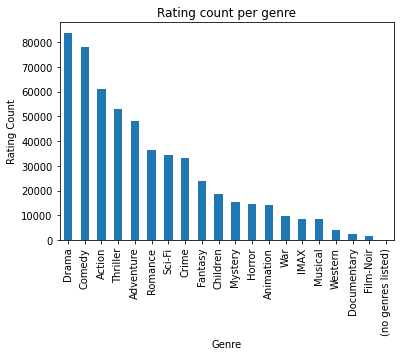

In [36]:
dim = 'genres'

# explode the dimension column to get the sub-dimensions
explode_all_data = all_data.explode(dim)
subdim_counts = explode_all_data[dim].value_counts()
print(subdim_counts)

# same result in the histogram

subdim_counts.plot.bar()
plt.title("Rating count per genre")
plt.ylabel("Rating Count")
plt.xlabel("Genre")
plt.show()

                 Genre  Average Ratings  Mean  Diff from Mean
0   (no genres listed)         3.489362  3.57       -0.080638
1               Action         3.447984  3.57       -0.122016
2            Adventure         3.508609  3.57       -0.061391
3            Animation         3.629937  3.57        0.059937
4             Children         3.412956  3.57       -0.157044
5               Comedy         3.384721  3.57       -0.185279
6                Crime         3.658294  3.57        0.088294
7          Documentary         3.797785  3.57        0.227785
8                Drama         3.656184  3.57        0.086184
9              Fantasy         3.491001  3.57       -0.078999
10           Film-Noir         3.920115  3.57        0.350115
11              Horror         3.258195  3.57       -0.311805
12                IMAX         3.618335  3.57        0.048335
13             Musical         3.563678  3.57       -0.006322
14             Mystery         3.632460  3.57        0.062460
15      

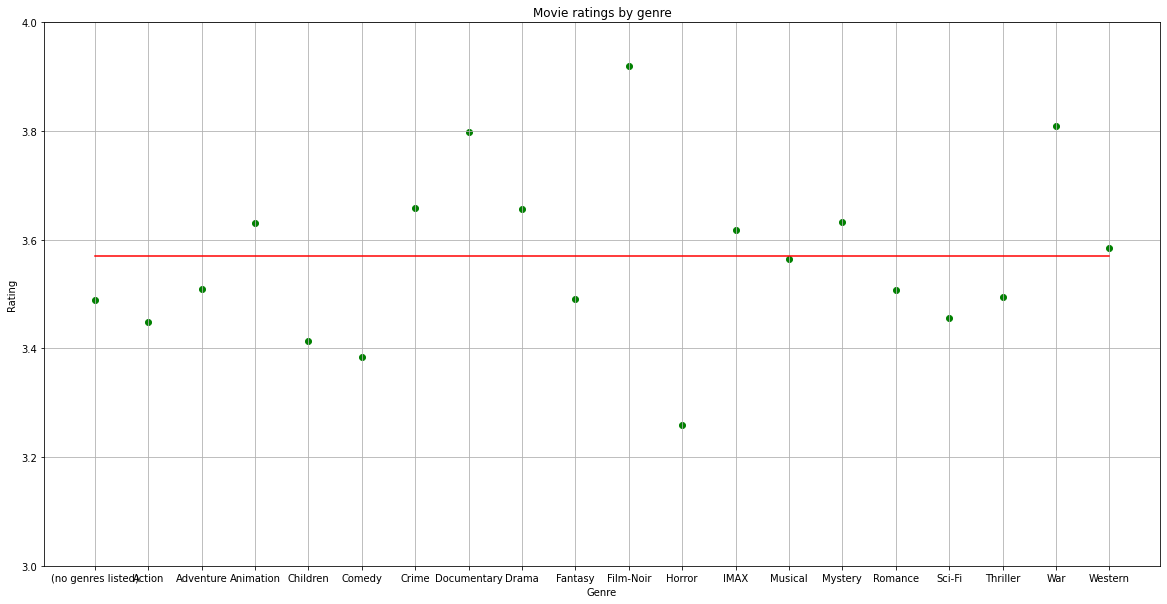

In [37]:
#Calculating Average Mean scores per genre
subdim_ratings = explode_all_data.groupby(dim)['rating'].mean()
genre_ratings = pd.DataFrame({'Genre':subdim_ratings.index, 'Average Ratings':subdim_ratings.values})
genre_ratings['Mean'] = round(genre_ratings['Average Ratings'].mean(), 2)
overall_mean = round(genre_ratings['Average Ratings'].mean(), 2)
genre_ratings['Diff from Mean'] = genre_ratings['Average Ratings'] - overall_mean
print(genre_ratings)

# same result in the scatter plot
plt.figure(figsize=(20,10))
plt.scatter(subdim_ratings.index, subdim_ratings, color='g')
plt.plot(subdim_ratings.index, genre_ratings['Mean'], color="red")
plt.rcParams["figure.figsize"] = (10,2)
plt.title('Movie ratings by genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.ylim(ymax = 4, ymin = 3)
plt.grid(True)

### *CREATION OF CORRELATION MATRIX*

Pearsons correlation: -0.049
[[ 1.         -0.04934798]
 [-0.04934798  1.        ]]
0.0067734839929045046
-0.004061028408948584
-0.04934798037340375
           userId   movieId    rating
userId   1.000000  0.006773 -0.049348
movieId  0.006773  1.000000 -0.004061
rating  -0.049348 -0.004061  1.000000


<Axes: >

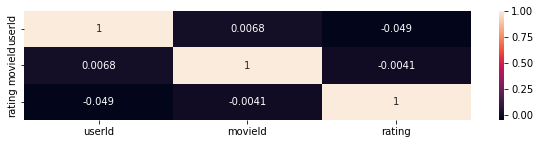

In [38]:
#Correlation between userID, movieId, rating
# Convert dataframe into series
list1 = all_data['userId']
list2 = all_data['rating']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
my_rho = np.corrcoef(list1, list2)

print('Pearsons correlation: %.3f' % corr)
print(my_rho)
# correlation between column 1 and column2
print(all_data['userId'] .corr(all_data['movieId']))
 
# correlation between column 2 and column3
print(all_data['movieId'].corr(all_data['rating']))
 
# correlation between column 1 and column3
print(all_data['userId'].corr(all_data['rating']))

# Creating a correlation matrix 
numericColumns = ['userId', 'movieId', 'rating']
correlationMatrix  = all_data.loc[:,numericColumns].corr()
# Printing the correlation matrix.
print(correlationMatrix)
# Displaying the correlation matrix
seaborn.heatmap(correlationMatrix, annot=True)

In [40]:
average_ratings = pd.DataFrame()

In [41]:
def calculate_average_ratings(dim):
  list1 = []
  # explode the cast dimension column and get the top 100 casts
  explode_all_data[dim] = explode_all_data[dim].apply(lambda x: str(x) if type(x) is list else x)
  subdim_counts = explode_all_data[dim].value_counts()
  top100_cast = subdim_counts.head(100)

  # calculate the average rating each cast recieved and get the average rating of the top 100 casts
  subdim_ratings = explode_all_data.groupby(dim)['rating'].mean()
  subdim_ratings.sort_values(ascending=False)
  for ikey in top100_cast.keys():
    list1.append(subdim_ratings.get(key = ikey))

  return list1

#Building Dataframe which contains 3 columns - cast, directors, movie
average_ratings['Cast Ratings'] = calculate_average_ratings('Cast')
average_ratings['Director Ratings'] = calculate_average_ratings('Directors')
average_ratings['Movie Ratings'] = calculate_average_ratings('title')
average_ratings

,Cast Ratings,Director Ratings,Movie Ratings
0,4.164134,3.736024,4.164134
1,4.197068,3.782933,4.197068
2,3.920930,4.015266,3.920930
3,3.941860,3.692991,3.941860
4,3.867647,4.040636,3.867647
...,...,...,...
95,3.766393,3.435559,3.879121
96,3.719780,3.294071,3.719780
97,4.056319,3.761364,3.198347
98,3.879121,3.508210,3.640496


In [42]:
# Convert dataframe into series
list1 = average_ratings['Director Ratings']
list2 = average_ratings['Movie Ratings']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
my_rho = np.corrcoef(list1, list2)

print('Pearsons correlation: %.3f' % corr)
print(my_rho)


Pearsons correlation: -0.038
[[ 1.         -0.03824822]
 [-0.03824822  1.        ]]


-0.06211303899852458
-0.03824822466303535
0.11210383009777611
                  Cast Ratings  Director Ratings  Movie Ratings
Cast Ratings          1.000000         -0.062113       0.112104
Director Ratings     -0.062113          1.000000      -0.038248
Movie Ratings         0.112104         -0.038248       1.000000


<Axes: >

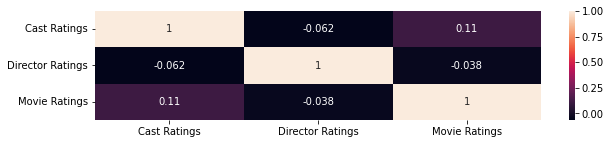

In [43]:
 # correlation between column 1 and column2
print(average_ratings['Cast Ratings'] .corr(average_ratings['Director Ratings']))
 
# correlation between column 2 and column3
print(average_ratings['Director Ratings'].corr(average_ratings['Movie Ratings']))
 
# correlation between column 1 and column3
print(average_ratings['Cast Ratings'].corr(average_ratings['Movie Ratings']))

# Creating a correlation matrix 
numericColumns = ['Cast Ratings', 'Director Ratings', 'Movie Ratings']
correlationMatrix  = average_ratings.loc[:,numericColumns].corr()
# Printing the correlation matrix.
print(correlationMatrix)
# Displaying the correlation matrix
seaborn.heatmap(correlationMatrix, annot=True)

Movie Recommendation System

In [44]:
#Feature Engineering
# 1. Average rating for each movie in the dataset.
Average_ratings = pd.DataFrame(all_data.groupby('title')['rating'].mean())

# 2. Total Number Of Rating 
# Rating of a movie is proportional to the total number of ratings
Average_ratings['Total Ratings'] = pd.DataFrame(all_data.groupby('title')['rating'].count())

# 3. Calculating the correlation
# creating a table where the rows are userIds and the columns represent the movies.
# The values of the matrix represent the rating for each movie by each user.
movie_user = all_data.pivot_table(index='userId',columns='title',values='rating')
cols = len(movie_user.axes[1])
print("Number of columns(Movies) : ", cols)

# 4. Computing pairwise correlation 
correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])

# 5. Remove all the empty values and merge the total ratings to the correlation table.
# The below table shows the correlation between Toy Story and other movies
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])

#Testing the recommender

# Filtering all the movies with a correlation value to Toy Story (1995) and with at least 100 ratings.
# Merging with movie dataset
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()
recc = recc.merge(movies,on='title', how='left')
recc.head(10)


Number of columns(Movies) :  9719


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,Correlation,Total Ratings,movieId,genres
0,Toy Story (1995),1.000000,430,1,Adventure|Animation|Children|Comedy|Fantasy
1,Toy Story 2 (1999),0.699211,194,3114,Adventure|Animation|Children|Comedy|Fantasy
2,Arachnophobia (1990),0.652424,106,2699,Comedy|Horror
3,"Incredibles, The (2004)",0.643301,250,8961,Action|Adventure|Animation|Children|Comedy
4,Finding Nemo (2003),0.618701,282,6377,Adventure|Animation|Children|Comedy
5,Aladdin (1992),0.611892,366,588,Adventure|Animation|Children|Comedy|Musical
6,Erin Brockovich (2000),0.598016,140,3408,Drama
7,Wallace & Gromit: The Wrong Trousers (1993),0.589625,112,1148,Animation|Children|Comedy|Crime
8,Blazing Saddles (1974),0.585892,124,3671,Comedy|Western
9,"Wolf of Wall Street, The (2013)",0.578479,108,106782,Comedy|Crime|Drama


In [45]:
# 2. Total Number Of Rating 
# Rating of a movie is proportional to the total number of ratings
Average_ratings['Total Ratings'] = pd.DataFrame(all_data.groupby('title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
title,,
'71 (2014),4.000000,2
'Hellboy': The Seeds of Creation (2004),4.000000,2
'Round Midnight (1986),3.500000,4
'Salem's Lot (2004),5.000000,2
'Til There Was You (1997),4.000000,4
'Tis the Season for Love (2015),1.500000,2
"'burbs, The (1989)",3.176471,34
'night Mother (1986),3.000000,2
(500) Days of Summer (2009),3.666667,84


In [46]:
# 3. Calculating the correlation
# creating a table where the rows are userIds and the columns represent the movies.
# The values of the matrix represent the rating for each movie by each user.
movie_user = all_data.pivot_table(index='userId',columns='title',values='rating')
cols = len(movie_user.axes[1])
print("Number of columns(Movies) : ", cols)
movie_user

Number of columns(Movies) :  9719


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [48]:
# 4. Computing pairwise correlation 
correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])
correlations.head(10)

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.240563
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.353833
*batteries not included (1987)            -0.427425
dtype: float64

In [51]:
# 5. Remove all the empty values and merge the total ratings to the correlation table.
# The below table shows the correlation between Toy Story and other movies
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])

In [52]:
#Testing the recommender

# Filtering all the movies with a correlation value to Toy Story (1995) and with at least 100 ratings.
# Merging with movie dataset
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()
recc = recc.merge(movies,on='title', how='left')
recc.head(10)

,title,Correlation,Total Ratings,movieId,genres
0,Toy Story (1995),1.000000,430,1,Adventure|Animation|Children|Comedy|Fantasy
1,Toy Story 2 (1999),0.699211,194,3114,Adventure|Animation|Children|Comedy|Fantasy
2,Arachnophobia (1990),0.652424,106,2699,Comedy|Horror
3,"Incredibles, The (2004)",0.643301,250,8961,Action|Adventure|Animation|Children|Comedy
4,Finding Nemo (2003),0.618701,282,6377,Adventure|Animation|Children|Comedy
5,Aladdin (1992),0.611892,366,588,Adventure|Animation|Children|Comedy|Musical
6,Erin Brockovich (2000),0.598016,140,3408,Drama
7,Wallace & Gromit: The Wrong Trousers (1993),0.589625,112,1148,Animation|Children|Comedy|Crime
8,Blazing Saddles (1974),0.585892,124,3671,Comedy|Western
9,"Wolf of Wall Street, The (2013)",0.578479,108,106782,Comedy|Crime|Drama


PLOTTING MOVIES WRT YEAR - Count of Rated Movies vs  production year

In [53]:
# Converting timestamp values to actual datetime format
all_data["rating_timestamp"] = pd.to_datetime(all_data["timestamp"], unit='s')
all_data.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,Directors,Cast,rating_timestamp
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",2000-07-30 18:45:03
1,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",2000-07-30 18:45:03
2,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",1996-11-08 06:36:02
3,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",1996-11-08 06:36:02
4,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",2005-01-25 06:52:26


In [54]:
# join ratings and movie on movieId
movies_rating = (ratings
                  .set_index("movieId")
                  .join(movies.set_index("movieId"),
                        how="left")
                 )

movies_rating.head()

,userId,rating,timestamp,title,genres
movieId,,,,,
1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,7,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,15,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,17,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [55]:
# quantifying genres - Creating dummies - 0s and 1s
dummies = movies_rating['genres'].str.get_dummies()
dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [56]:
tidy_movie_ratings = (pd.concat([movies_rating, dummies], axis=1)
                       .drop(["timestamp", "genres"], axis=1)
                )

tidy_movie_ratings["production_year"] = tidy_movie_ratings["title"].str[-5:-1]
tidy_movie_ratings["movie_title"] = tidy_movie_ratings["title"].str[:-7]
tidy_movie_ratings.reset_index(inplace=True)

tidy_movie_ratings.head(2)

,movieId,userId,rating,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,production_year,movie_title
0,1,1,4.0,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1995,Toy Story
1,1,5,4.0,Toy Story (1995),0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1995,Toy Story


In [83]:
# tidy_movie_ratings["production_year"] = tidy_movie_ratings["production_year"].astype(int)
tidy_movie_ratings = tidy_movie_ratings.drop(tidy_movie_ratings.loc[tidy_movie_ratings["production_year"] == 'irro'].index)
tidy_movie_ratings

condition = tidy_movie_ratings["production_year"].astype(int) < 2021

prodcount = (tidy_movie_ratings[condition][["production_year", "movieId"]]
             .groupby("production_year")
             .count()
            )

prodcount.tail(25)

# tidy_movie_ratings.loc[tidy_movie_ratings["production_year"] == ' Bab']

,movieId
production_year,
1994,5296
1995,6143
1996,4509
1997,3643
1998,3556
1999,4535
2000,4268
2001,3914
2002,3642


<Axes: title={'center': 'Count of Rated Movies - by production year'}, xlabel='production_year'>

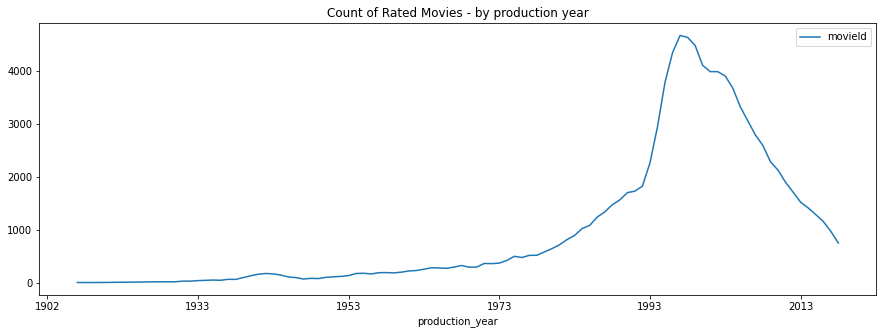

In [84]:
(prodcount
 .rolling(5).mean().rename(columns={"movie_id":"count"})
 .plot(figsize=(15,5),
       title="Count of Rated Movies - by production year")
)

In [ ]:
# Get the top 10 other similar users. 


Get the top 10 other similar users. 


In [85]:
#EDA 
# 1. Keeping movies with over 100 ratings
# Aggregate by movie
agg_ratings = all_data.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()
# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 18 to 9703
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              437 non-null    object 
 1   mean_rating        437 non-null    float64
 2   number_of_ratings  437 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.7+ KB


In [86]:
# Check popular movies
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,title,mean_rating,number_of_ratings
3158,Forrest Gump (1994),4.164134,658
7593,"Shawshank Redemption, The (1994)",4.429022,634
6865,Pulp Fiction (1994),4.197068,614
7680,"Silence of the Lambs, The (1991)",4.161290,558
5512,"Matrix, The (1999)",4.192446,556


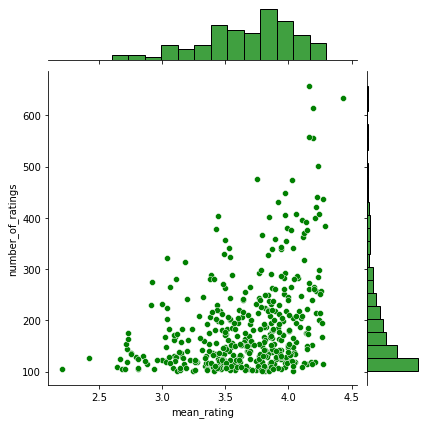

In [100]:
# Visulization
# correlation between the average rating and the number of ratings.
# Observation : popular movies get higher ratings since higher mean_rating implies more watched movies.
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100, color='g')

In [88]:
# Merge all_data with agg_ratings_GT_100
df_GT100 = pd.merge(all_data, agg_ratings_GT100[['title']], on='title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81424 entries, 0 to 81423
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   userId            81424 non-null  int64         
 1   movieId           81424 non-null  int64         
 2   rating            81424 non-null  float64       
 3   timestamp         81424 non-null  int64         
 4   title             81424 non-null  object        
 5   genres            81424 non-null  object        
 6   imdbId            81424 non-null  int64         
 7   tmdbId            81424 non-null  float64       
 8   Directors         81424 non-null  object        
 9   Cast              81424 non-null  object        
 10  rating_timestamp  81424 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [89]:
# Number of users
print('The ratings dataset has', df_GT100['userId'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', df_GT100['movieId'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique()))

The ratings dataset has 606 unique users
The ratings dataset has 438 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [90]:
# STEP 2 : Creating User-Movie Matrix

# Create user-item matrix
matrix = df_GT100.pivot_table(index='userId', columns='title', values='rating')
matrix.head()

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,5.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#STEP 5 : Data Normalization
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.382609,NaN,NaN,...,NaN,0.617391,0.617391,NaN,0.617391,NaN,NaN,0.617391,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.107143,NaN,NaN,NaN,NaN,-0.892857,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.542169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.542169,1.542169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#STEP 6: Identify Similar Users
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.265673,0.268749,-0.409448,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,0.047961,0.025671,-0.325960,-0.031252,0.115951,0.123941,0.158950,-0.175412,-0.041819
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.711406
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.265673,NaN,NaN,1.000000,-0.398485,0.359738,0.648810,0.117851,NaN,0.560335,...,-0.239260,0.486818,0.045493,-0.148544,0.460566,0.086336,0.157744,-0.148061,NaN,-0.046456
5,0.268749,NaN,NaN,-0.398485,1.000000,0.033429,0.328889,0.028347,NaN,-0.777714,...,0.000000,0.174285,0.204157,0.063383,-0.364156,0.300060,0.231080,0.005242,0.384111,0.040582


In [93]:
# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.00357786,  0.        , ...,  0.07792165,
        -0.04481077,  0.00345383],
       [ 0.00357786,  1.        ,  0.        , ..., -0.00492438,
        -0.12589932,  0.13538908],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.07792165, -0.00492438,  0.        , ...,  1.        ,
         0.08740481,  0.04344903],
       [-0.04481077, -0.12589932,  0.        , ...,  0.08740481,
         1.        , -0.07322672],
       [ 0.00345383,  0.13538908,  0.        , ...,  0.04344903,
        -0.07322672,  1.        ]])

In [94]:
# -1 means opposite movie preference and 1 means same movie preference.
# Pick a user ID
picked_userid = 414
# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)
# Take a look at the data
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.265673,0.268749,-0.409448,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,0.047961,0.025671,-0.325960,-0.031252,0.115951,0.123941,0.158950,-0.175412,-0.041819
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.711406
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.265673,NaN,NaN,1.000000,-0.398485,0.359738,0.648810,0.117851,NaN,0.560335,...,-0.239260,0.486818,0.045493,-0.148544,0.460566,0.086336,0.157744,-0.148061,NaN,-0.046456
5,0.268749,NaN,NaN,-0.398485,1.000000,0.033429,0.328889,0.028347,NaN,-0.777714,...,0.000000,0.174285,0.204157,0.063383,-0.364156,0.300060,0.231080,0.005242,0.384111,0.040582


In [95]:
# Number of similar users
# Picking top 10 similar users
n = 10
# User similarity threashold
user_similarity_threshold = 0.6
# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]
# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)


The similar users for user 414 are userId
87     1.000000
508    1.000000
406    0.944911
506    0.943288
146    0.894737
494    0.857077
518    0.852422
55     0.776708
595    0.774597
499    0.771744
Name: 414, dtype: float64
